In [1]:
%matplotlib inline
import os, sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets, linear_model
from sklearn.metrics import f1_score, classification_report, confusion_matrix, make_scorer
from sklearn.preprocessing import OneHotEncoder
import keras
from keras.models import Sequential
from keras.layers import Input, Dense
from keras.models import Model
from keras.optimizers import SGD
from keras import regularizers
from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
from keras import backend as K
import tensorflow as tf

Using TensorFlow backend.


In [2]:
np.finfo(np.float32).eps, np.sqrt(np.finfo(np.float32).eps), np.power(np.finfo(np.float32).eps, 0.7)

(1.1920929e-07, 0.00034526698, 1.4236953606213502e-05)

In [3]:
np.finfo(np.float64).eps, np.sqrt(np.finfo(np.float64).eps)

(2.220446049250313e-16, 1.4901161193847656e-08)

In [4]:
sys.path.append('/home/admin/github/wordroid.sblo.jp/lib')
from keras_ex.gkernel import GaussianKernel, GaussianKernel2, GaussianKernel3
from keras_ex.gkernel.sklearn import (
    RBFClassifier, RBFRegressor,
    make_model_gkernel3,
    make_model_gkernel2,
    make_model_gkernel1,
    make_model_out,
    make_model
)

In [5]:
iris = datasets.load_iris()
X = iris.data.astype(np.float32)
Y = iris.target
N = Y.size
Y2 = keras.utils.to_categorical(Y, num_classes=3)

index = np.arange(N)
xtrain = X[index[index % 2 != 0],:]
ytrain = Y2[index[index % 2 != 0]]
xtest = X[index[index % 2 == 0],:]
yans = Y2[index[index % 2 == 0]]

In [6]:
#lm, model_gkernel = make_model_gkernel2()
lm, model_gkernel = make_model_gkernel3()
print(model_gkernel.inputs[0])
model_gkernel.summary()

W1007 21:24:23.444859 140274474784576 deprecation_wrapper.py:119] From /home/admin/miniconda3/envs/da02/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1007 21:24:23.482937 140274474784576 deprecation_wrapper.py:119] From /home/admin/miniconda3/envs/da02/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1007 21:24:23.499059 140274474784576 deprecation_wrapper.py:119] From /home/admin/miniconda3/envs/da02/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W1007 21:24:23.500066 140274474784576 deprecation_wrapper.py:119] From /home/admin/miniconda3/envs/da02/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:181: The name tf.ConfigProto is deprecated. P

Tensor("inp:0", shape=(?, 4), dtype=float32)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inp (InputLayer)             (None, 4)                 0         
_________________________________________________________________
gkernel (GaussianKernel3)    (None, 2)                 9         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [7]:
model_out = make_model_out()
model_out.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inp (InputLayer)             (None, 2)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 9         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [8]:
model = make_model(nn=4, num_cls=3, make_model_gkernel=make_model_gkernel3)
model.summary()

W1007 21:24:23.759838 140274474784576 deprecation_wrapper.py:119] From /home/admin/miniconda3/envs/da02/lib/python3.6/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inp (InputLayer)             (None, 4)                 0         
_________________________________________________________________
model_gkernel (Model)        (None, 2)                 9         
_________________________________________________________________
model_out (Model)            (None, 3)                 9         
Total params: 18
Trainable params: 9
Non-trainable params: 9
_________________________________________________________________


In [9]:
model.fit(xtrain, ytrain, epochs=5, verbose=2)

W1007 21:24:23.905977 140274474784576 deprecation.py:323] From /home/admin/miniconda3/envs/da02/lib/python3.6/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/5
 - 0s - loss: 1.1054 - acc: 0.2400
Epoch 2/5
 - 0s - loss: 1.1042 - acc: 0.2400
Epoch 3/5
 - 0s - loss: 1.0986 - acc: 0.3867
Epoch 4/5
 - 0s - loss: 1.1014 - acc: 0.3333
Epoch 5/5
 - 0s - loss: 1.1001 - acc: 0.3333


In [10]:
pred = model.predict(xtrain)
pred[:5]

array([[0.35297996, 0.31179762, 0.33522248],
       [0.35302943, 0.31181228, 0.33515826],
       [0.3529201 , 0.31177932, 0.3353006 ],
       [0.35294023, 0.31178555, 0.33527422],
       [0.35296714, 0.31179363, 0.33523923]], dtype=float32)

In [11]:
np.random.choice(np.arange(xtrain.shape[0]), 3)

array([35, 23, 33])

In [12]:
model.save('saved_model')

In [13]:
ls -la

合計 6620
drwxrwxr-x. 3 admin admin    4096 10月  7 08:50 ./
drwxrwxr-x. 7 admin admin    4096  9月 16 10:46 ../
drwxr-xr-x. 2 admin admin    4096 10月  6 18:05 .ipynb_checkpoints/
-rw-rw-r--. 1 admin admin 1032576 10月  7 08:44 dev_001-iris.ipynb
-rw-rw-r--. 1 admin admin  306244 10月  4 22:56 dev_002-digits8.ipynb
-rw-rw-r--. 1 admin admin 2214880 10月  7 08:50 dev_003-moon.ipynb
-rw-rw-r--. 1 admin admin 1515350 10月  7 08:50 dev_004-moon2.ipynb
-rw-rw-r--. 1 admin admin  156335 10月  4 22:56 dev_005-digits28.ipynb
-rw-rw-r--. 1 admin admin  816425 10月  6 17:02 dev_006-Hyperbola_dim2.ipynb
-rw-rw-r--. 1 admin admin   73508 10月  6 18:23 dev_007-regression.ipynb
-rw-rw-r--. 1 admin admin  562555 10月  5 07:48 iris-landmark_example.ipynb
-rw-rw-r--. 1 admin admin   23772 10月  5 17:06 iris-make_model_example.ipynb
-rw-rw-r--. 1 admin admin   21494 10月  5 08:43 iris-session_clear_example.ipynb
-rw-rw-r--. 1 admin admin   21904 10月  7 21:24 saved_model


In [14]:
from keras.models import load_model

In [15]:
# load_model('saved_model', custom_objects={'GaussianKernel2': GaussianKernel2})
m = load_model('saved_model', custom_objects={'GaussianKernel3': GaussianKernel3})

/home/admin/miniconda3/envs/da02/lib/python3.6/site-packages/keras/engine/saving.py:327: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '


In [16]:
pred = m.predict(xtrain)
pred[:5]

array([[0.35297996, 0.31179762, 0.33522248],
       [0.35302943, 0.31181228, 0.33515826],
       [0.3529201 , 0.31177932, 0.3353006 ],
       [0.35294023, 0.31178555, 0.33527422],
       [0.35296714, 0.31179363, 0.33523923]], dtype=float32)

## Getting Started

In [17]:
'''
number of landmarks is 15
'''
clf = RBFClassifier(
    num_lm=15,
    lm_select_from_x=True
)

In [18]:
%%time
#hst = clf.fit(xtrain, ytrain, epochs=500, batch_size=256, verbose=0)
hst = clf.fit(xtrain, ytrain, epochs=200, verbose=0)

CPU times: user 3.21 s, sys: 76.1 ms, total: 3.28 s
Wall time: 2.93 s


In [19]:
clf.sk_params

{'callbacks': None,
 'epochs_warmup': 10,
 'lm': None,
 'lm_select_from_x': True,
 'loss': None,
 'lr': None,
 'nn': None,
 'num_cls': 3,
 'num_lm': 15}

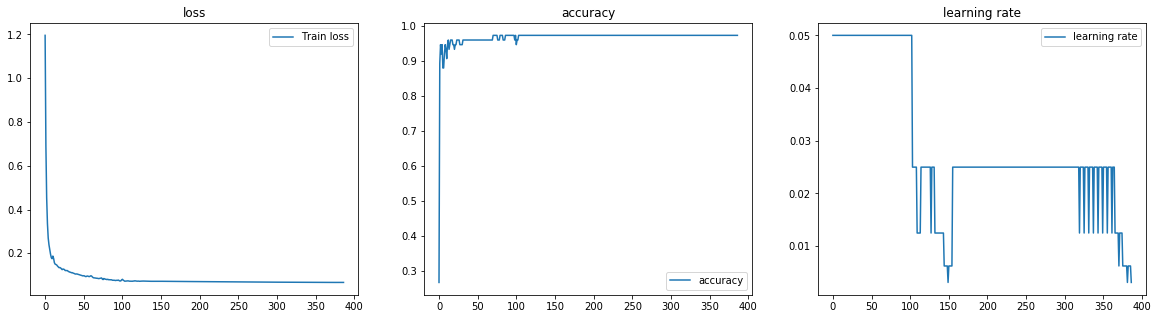

In [20]:
fig, ax = plt.subplots(1, 3, figsize=(20,5))
ax[0].set_title('loss')
ax[0].plot(list(range(len(hst["loss"]))), hst["loss"], label="Train loss")
ax[1].set_title('accuracy')
ax[1].plot(list(range(len(hst["loss"]))), hst["acc"], label="accuracy")
ax[2].set_title('learning rate')
ax[2].plot(list(range(len(hst["loss"]))), hst["lr"], label="learning rate")
ax[0].legend()
ax[1].legend()
ax[2].legend()

In [21]:
'''
trained gamma
'''
clf.current_gamma()

0.8119051

In [22]:
'''
fixed landmarks
'''
lm = clf.current_lm()
lm

array([[4.5, 2.3, 1.3, 0.3],
       [6.4, 2.7, 5.3, 1.9],
       [6.8, 3.2, 5.9, 2.3],
       [7.2, 3.6, 6.1, 2.5],
       [5.6, 2.5, 3.9, 1.1],
       [5.7, 4.4, 1.5, 0.4],
       [4.7, 3.2, 1.6, 0.2],
       [5.2, 3.5, 1.5, 0.2],
       [5.9, 3. , 5.1, 1.8],
       [6.7, 3. , 5.2, 2.3],
       [6.9, 3.1, 5.4, 2.1],
       [4.6, 3.2, 1.4, 0.2],
       [6.1, 3. , 4.6, 1.4],
       [6.7, 3.1, 4.4, 1.4],
       [6.9, 3.1, 5.1, 2.3]], dtype=float32)

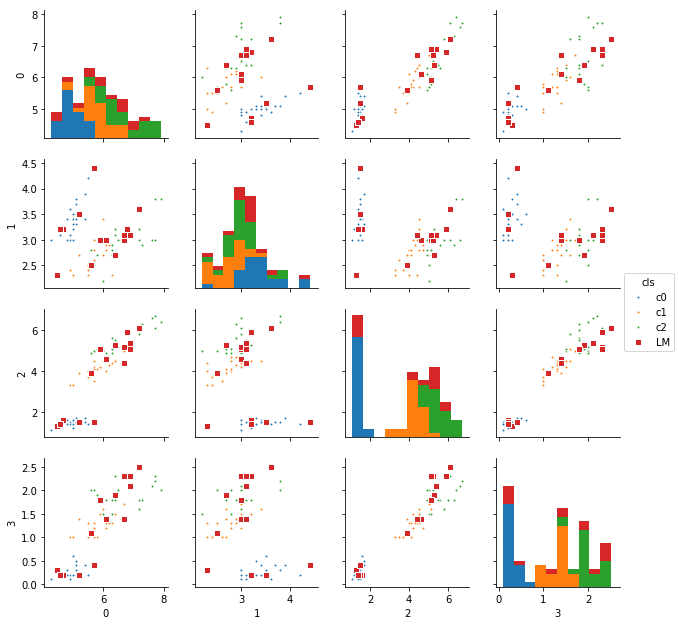

In [23]:
df = pd.DataFrame(np.r_[xtrain, lm])
df['cls'] = ['c'+str(ee) for ee in np.argmax(ytrain, axis=1)] + ['LM']*lm.shape[0]
df.head()

fig = sns.pairplot(df, markers=['.']*3+['s'], hue='cls', size=2.2, diag_kind='hist')

In [24]:
clf.predict_proba(xtest)[:5]

array([[9.9998581e-01, 1.4166253e-05, 7.2581229e-12],
       [9.9998236e-01, 1.7627957e-05, 3.6979756e-13],
       [9.9998486e-01, 1.5190115e-05, 9.9812710e-12],
       [9.9997306e-01, 2.6975371e-05, 1.7468281e-12],
       [9.9991834e-01, 8.1657185e-05, 3.3084499e-12]], dtype=float32)

In [25]:
pred = clf.predict(xtrain)
pred[:5]

array([0, 0, 0, 0, 0])

In [26]:
print('F1_SCORE :', f1_score(np.argmax(ytrain, axis=1), pred, average='macro'))
print(classification_report(np.argmax(ytrain, axis=1), pred))
print(confusion_matrix(np.argmax(ytrain, axis=1), pred))

F1_SCORE : 0.9732905982905983
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      0.92      0.96        25
           2       0.93      1.00      0.96        25

   micro avg       0.97      0.97      0.97        75
   macro avg       0.98      0.97      0.97        75
weighted avg       0.98      0.97      0.97        75

[[25  0  0]
 [ 0 23  2]
 [ 0  0 25]]


In [27]:
pred_test = clf.predict(xtest)

In [28]:
print('F1_SCORE :', f1_score(np.argmax(yans, axis=1), pred_test, average='macro'))
print(classification_report(np.argmax(yans, axis=1), pred_test))
print(confusion_matrix(np.argmax(yans, axis=1), pred_test))

F1_SCORE : 0.9599839935974389
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       0.92      0.96      0.94        25
           2       0.96      0.92      0.94        25

   micro avg       0.96      0.96      0.96        75
   macro avg       0.96      0.96      0.96        75
weighted avg       0.96      0.96      0.96        75

[[25  0  0]
 [ 0 24  1]
 [ 0  2 23]]


## set landmarks on input x

In [29]:
clf = RBFClassifier(
    num_lm=3,
    lm=xtrain[:3]
)

In [30]:
%%time
#hst = clf.fit(xtrain, ytrain, epochs=500, batch_size=256, verbose=0)
hst = clf.fit(xtrain, ytrain, epochs=200, verbose=0)

CPU times: user 4.99 s, sys: 152 ms, total: 5.14 s
Wall time: 4.33 s


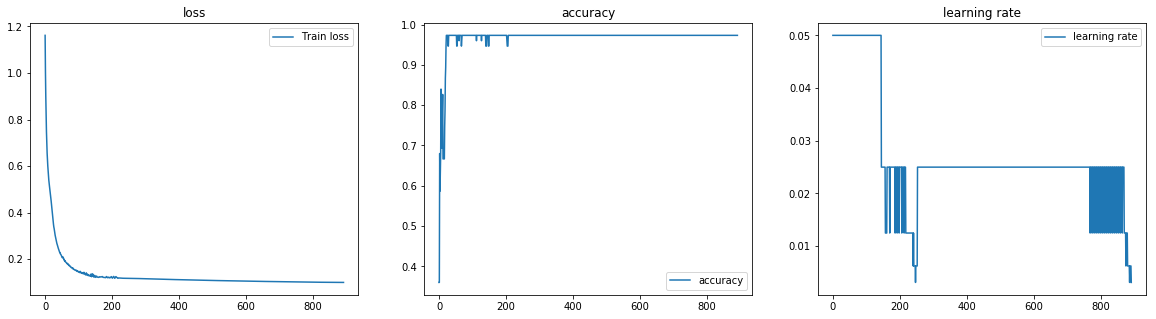

In [31]:
fig, ax = plt.subplots(1, 3, figsize=(20,5))
ax[0].set_title('loss')
ax[0].plot(list(range(len(hst["loss"]))), hst["loss"], label="Train loss")
ax[1].set_title('accuracy')
ax[1].plot(list(range(len(hst["loss"]))), hst["acc"], label="accuracy")
ax[2].set_title('learning rate')
ax[2].plot(list(range(len(hst["loss"]))), hst["lr"], label="learning rate")
ax[0].legend()
ax[1].legend()
ax[2].legend()

In [32]:
'''
trained gamma
'''
clf.current_gamma()

0.14060871

In [33]:
'''
fixed landmarks
'''
lm = clf.current_lm()
lm

array([[4.9, 3. , 1.4, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5.4, 3.9, 1.7, 0.4]], dtype=float32)

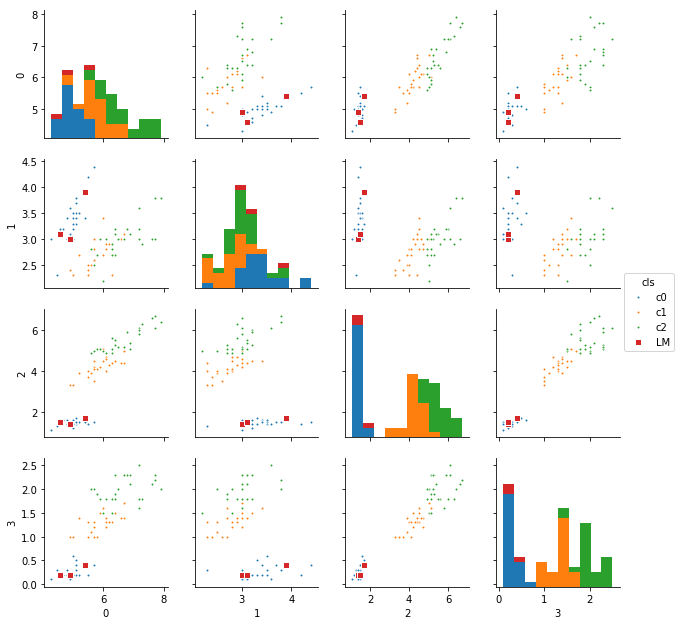

In [34]:
df = pd.DataFrame(np.r_[xtrain, lm])
df['cls'] = ['c'+str(ee) for ee in np.argmax(ytrain, axis=1)] + ['LM']*lm.shape[0]
df.head()

fig = sns.pairplot(df, markers=['.']*3+['s'], hue='cls', size=2.2, diag_kind='hist')

In [35]:
clf.predict_proba(xtest)[:5]

array([[9.9764413e-01, 2.3558091e-03, 2.5546615e-20],
       [9.9732959e-01, 2.6703516e-03, 5.7417611e-20],
       [9.9749398e-01, 2.5060796e-03, 3.2111591e-20],
       [9.9721438e-01, 2.7857083e-03, 6.3033418e-20],
       [9.9407357e-01, 5.9264749e-03, 1.2857527e-18]], dtype=float32)

In [36]:
pred = clf.predict(xtrain)
pred[:5]

array([0, 0, 0, 0, 0])

In [37]:
print('F1_SCORE :', f1_score(np.argmax(ytrain, axis=1), pred, average='macro'))
print(classification_report(np.argmax(ytrain, axis=1), pred))
print(confusion_matrix(np.argmax(ytrain, axis=1), pred))

F1_SCORE : 0.9732905982905983
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      0.92      0.96        25
           2       0.93      1.00      0.96        25

   micro avg       0.97      0.97      0.97        75
   macro avg       0.98      0.97      0.97        75
weighted avg       0.98      0.97      0.97        75

[[25  0  0]
 [ 0 23  2]
 [ 0  0 25]]


In [38]:
pred_test = clf.predict(xtest)

In [39]:
print('F1_SCORE :', f1_score(np.argmax(yans, axis=1), pred_test, average='macro'))
print(classification_report(np.argmax(yans, axis=1), pred_test))
print(confusion_matrix(np.argmax(yans, axis=1), pred_test))

F1_SCORE : 0.9198717948717948
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       0.91      0.84      0.87        25
           2       0.85      0.92      0.88        25

   micro avg       0.92      0.92      0.92        75
   macro avg       0.92      0.92      0.92        75
weighted avg       0.92      0.92      0.92        75

[[25  0  0]
 [ 0 21  4]
 [ 0  2 23]]


## set landmarks on input x randomly

In [40]:
clf = RBFClassifier(
    num_lm=3,
    lm=xtrain[np.random.choice(np.arange(xtrain.shape[0]), 3, replace=False)]
)

In [41]:
%%time
#hst = clf.fit(xtrain, ytrain, epochs=500, batch_size=256, verbose=0)
hst = clf.fit(xtrain, ytrain, epochs=200, verbose=0)

CPU times: user 3.89 s, sys: 85.4 ms, total: 3.97 s
Wall time: 3.44 s


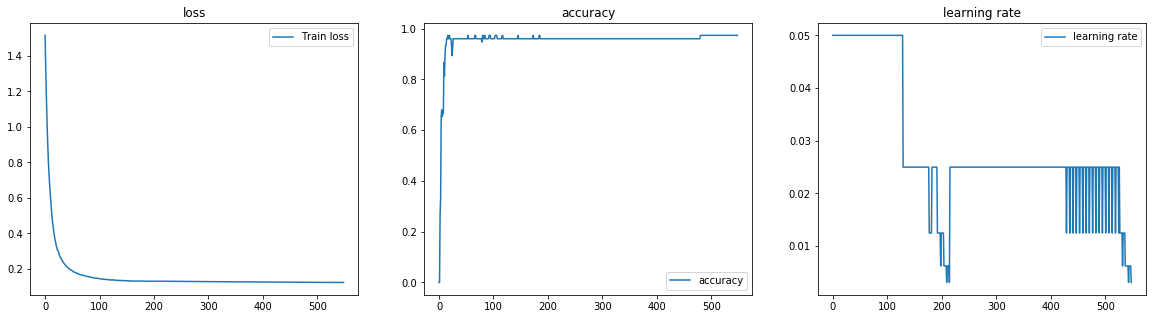

In [42]:
fig, ax = plt.subplots(1, 3, figsize=(20,5))
ax[0].set_title('loss')
ax[0].plot(list(range(len(hst["loss"]))), hst["loss"], label="Train loss")
ax[1].set_title('accuracy')
ax[1].plot(list(range(len(hst["loss"]))), hst["acc"], label="accuracy")
ax[2].set_title('learning rate')
ax[2].plot(list(range(len(hst["loss"]))), hst["lr"], label="learning rate")
ax[0].legend()
ax[1].legend()
ax[2].legend()

In [43]:
'''
trained gamma
'''
clf.current_gamma()

0.2874966

In [44]:
'''
fixed landmarks
'''
lm = clf.current_lm()
lm

array([[6.4, 3.2, 5.3, 2.3],
       [4.9, 3.1, 1.5, 0.1],
       [6.1, 2.8, 4.7, 1.2]], dtype=float32)

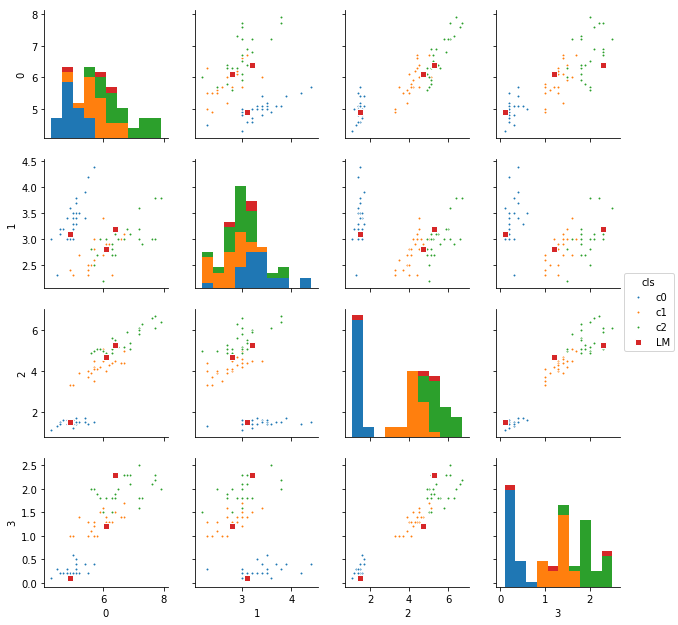

In [45]:
df = pd.DataFrame(np.r_[xtrain, lm])
df['cls'] = ['c'+str(ee) for ee in np.argmax(ytrain, axis=1)] + ['LM']*lm.shape[0]
df.head()

fig = sns.pairplot(df, markers=['.']*3+['s'], hue='cls', size=2.2, diag_kind='hist')

In [46]:
clf.predict_proba(xtest)[:5]

array([[9.9884927e-01, 1.1407672e-03, 9.9913632e-06],
       [9.9919707e-01, 7.9669268e-04, 6.1607275e-06],
       [9.9871254e-01, 1.2749697e-03, 1.2457223e-05],
       [9.9889022e-01, 1.0995690e-03, 1.0235747e-05],
       [9.9870181e-01, 1.2844360e-03, 1.3693380e-05]], dtype=float32)

In [47]:
pred = clf.predict(xtrain)
pred[:5]

array([0, 0, 0, 0, 0])

In [48]:
print('F1_SCORE :', f1_score(np.argmax(ytrain, axis=1), pred, average='macro'))
print(classification_report(np.argmax(ytrain, axis=1), pred))
print(confusion_matrix(np.argmax(ytrain, axis=1), pred))

F1_SCORE : 0.9733333333333333
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       0.96      0.96      0.96        25
           2       0.96      0.96      0.96        25

   micro avg       0.97      0.97      0.97        75
   macro avg       0.97      0.97      0.97        75
weighted avg       0.97      0.97      0.97        75

[[25  0  0]
 [ 0 24  1]
 [ 0  1 24]]


In [49]:
pred_test = clf.predict(xtest)

In [50]:
print('F1_SCORE :', f1_score(np.argmax(yans, axis=1), pred_test, average='macro'))
print(classification_report(np.argmax(yans, axis=1), pred_test))
print(confusion_matrix(np.argmax(yans, axis=1), pred_test))

F1_SCORE : 0.9194847020933977
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       0.95      0.80      0.87        25
           2       0.83      0.96      0.89        25

   micro avg       0.92      0.92      0.92        75
   macro avg       0.93      0.92      0.92        75
weighted avg       0.93      0.92      0.92        75

[[25  0  0]
 [ 0 20  5]
 [ 0  1 24]]


## set landmarks on input x randomly (num_lm = 25)

In [51]:
num_lm = 25
clf = RBFClassifier(
    num_lm=num_lm,
    lm=xtrain[np.random.choice(np.arange(xtrain.shape[0]), num_lm)]
)

In [52]:
%%time
#hst = clf.fit(xtrain, ytrain, epochs=500, batch_size=256, verbose=0)
hst = clf.fit(xtrain, ytrain, epochs=200, verbose=0)

CPU times: user 2.65 s, sys: 36.2 ms, total: 2.68 s
Wall time: 2.47 s


In [53]:
clf.model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inp (InputLayer)             (None, 4)                 0         
_________________________________________________________________
model_gkernel (Model)        (None, 25)                1         
_________________________________________________________________
model_out (Model)            (None, 3)                 78        
Total params: 79
Trainable params: 79
Non-trainable params: 0
_________________________________________________________________


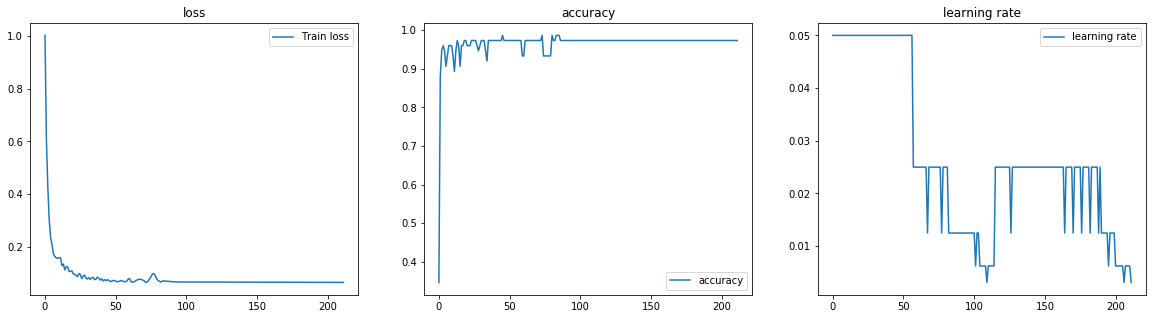

In [54]:
fig, ax = plt.subplots(1, 3, figsize=(20,5))
ax[0].set_title('loss')
ax[0].plot(list(range(len(hst["loss"]))), hst["loss"], label="Train loss")
ax[1].set_title('accuracy')
ax[1].plot(list(range(len(hst["loss"]))), hst["acc"], label="accuracy")
ax[2].set_title('learning rate')
ax[2].plot(list(range(len(hst["loss"]))), hst["lr"], label="learning rate")
ax[0].legend()
ax[1].legend()
ax[2].legend()

In [55]:
'''
trained gamma
'''
clf.current_gamma()

0.71748847

In [56]:
'''
fixed landmarks
'''
lm = clf.current_lm()
lm

array([[6.3, 2.9, 5.6, 1.8],
       [6. , 2.2, 5. , 1.5],
       [6. , 2.2, 5. , 1.5],
       [6.1, 3. , 4.9, 1.8],
       [6.1, 2.9, 4.7, 1.4],
       [5. , 2.3, 3.3, 1. ],
       [5. , 2.3, 3.3, 1. ],
       [5.2, 3.5, 1.5, 0.2],
       [6.4, 3.2, 4.5, 1.5],
       [5.6, 2.5, 3.9, 1.1],
       [5.6, 2.5, 3.9, 1.1],
       [6. , 2.7, 5.1, 1.6],
       [5.6, 2.8, 4.9, 2. ],
       [6. , 2.2, 5. , 1.5],
       [5.5, 2.4, 3.7, 1. ],
       [5.6, 2.8, 4.9, 2. ],
       [6.1, 2.8, 4.7, 1.2],
       [5.9, 3. , 5.1, 1.8],
       [6.2, 2.9, 4.3, 1.3],
       [6.1, 2.8, 4.7, 1.2],
       [5. , 3.4, 1.5, 0.2],
       [6.7, 3. , 5. , 1.7],
       [5.8, 2.7, 4.1, 1. ],
       [7.6, 3. , 6.6, 2.1],
       [7.7, 3.8, 6.7, 2.2]], dtype=float32)

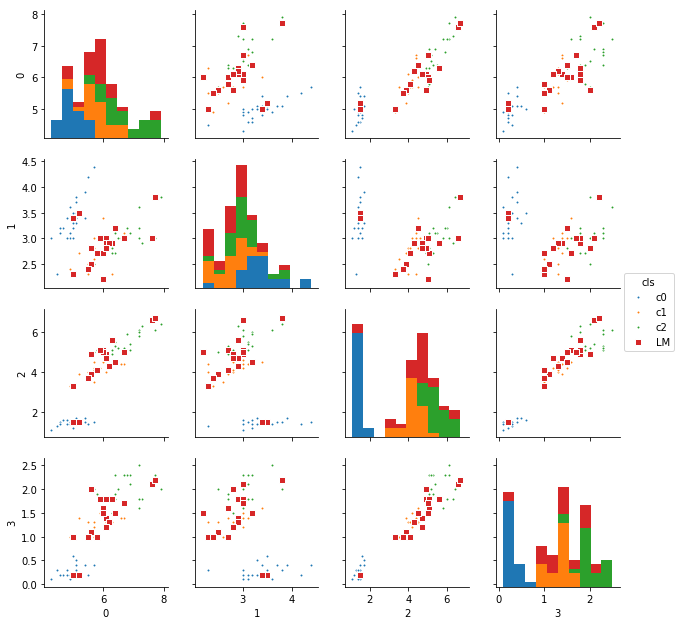

In [57]:
df = pd.DataFrame(np.r_[xtrain, lm])
df['cls'] = ['c'+str(ee) for ee in np.argmax(ytrain, axis=1)] + ['LM']*lm.shape[0]
df.head()

fig = sns.pairplot(df, markers=['.']*3+['s'], hue='cls', size=2.2, diag_kind='hist')

In [58]:
clf.predict_proba(xtest)[:5]

array([[9.99998331e-01, 8.87753288e-07, 8.43682471e-07],
       [9.99988079e-01, 5.54351982e-06, 6.26053134e-06],
       [9.99997854e-01, 1.11543443e-06, 1.10054623e-06],
       [9.99987245e-01, 5.96558630e-06, 6.73840350e-06],
       [9.99716818e-01, 1.17317824e-04, 1.65842095e-04]], dtype=float32)

In [59]:
pred = clf.predict(xtrain)
pred[:5]

array([0, 0, 0, 0, 0])

In [60]:
print('F1_SCORE :', f1_score(np.argmax(ytrain, axis=1), pred, average='macro'))
print(classification_report(np.argmax(ytrain, axis=1), pred))
print(confusion_matrix(np.argmax(ytrain, axis=1), pred))

F1_SCORE : 0.9732905982905983
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      0.92      0.96        25
           2       0.93      1.00      0.96        25

   micro avg       0.97      0.97      0.97        75
   macro avg       0.98      0.97      0.97        75
weighted avg       0.98      0.97      0.97        75

[[25  0  0]
 [ 0 23  2]
 [ 0  0 25]]


In [61]:
pred_test = clf.predict(xtest)

In [62]:
print('F1_SCORE :', f1_score(np.argmax(yans, axis=1), pred_test, average='macro'))
print(classification_report(np.argmax(yans, axis=1), pred_test))
print(confusion_matrix(np.argmax(yans, axis=1), pred_test))

F1_SCORE : 0.9733333333333333
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       0.96      0.96      0.96        25
           2       0.96      0.96      0.96        25

   micro avg       0.97      0.97      0.97        75
   macro avg       0.97      0.97      0.97        75
weighted avg       0.97      0.97      0.97        75

[[25  0  0]
 [ 0 24  1]
 [ 0  1 24]]


## set landmarks automatically on input x
* num_lm = 25

In [63]:
num_lm = 25
clf = RBFClassifier(
    num_lm=num_lm,
    lm_select_from_x=True,
    random_state=10001
)

In [64]:
%%time
#hst = clf.fit(xtrain, ytrain, epochs=500, batch_size=256, verbose=0)
hst = clf.fit(xtrain, ytrain, epochs=200, verbose=0)

CPU times: user 2.37 s, sys: 31.2 ms, total: 2.41 s
Wall time: 2.22 s


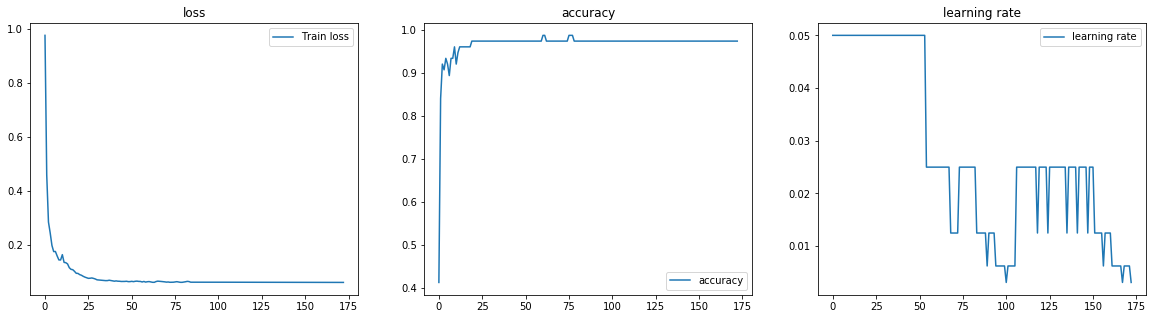

In [65]:
fig, ax = plt.subplots(1, 3, figsize=(20,5))
ax[0].set_title('loss')
ax[0].plot(list(range(len(hst["loss"]))), hst["loss"], label="Train loss")
ax[1].set_title('accuracy')
ax[1].plot(list(range(len(hst["loss"]))), hst["acc"], label="accuracy")
ax[2].set_title('learning rate')
ax[2].plot(list(range(len(hst["loss"]))), hst["lr"], label="learning rate")
ax[0].legend()
ax[1].legend()
ax[2].legend()

In [66]:
'''
trained gamma
'''
clf.current_gamma()

1.075368

In [67]:
'''
fixed landmarks
'''
lm = clf.current_lm()
lm

array([[6. , 3.4, 4.5, 1.6],
       [6.1, 3. , 4.9, 1.8],
       [6.4, 3.2, 5.3, 2.3],
       [5.5, 4.2, 1.4, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [6. , 2.2, 5. , 1.5],
       [4.6, 3.1, 1.5, 0.2],
       [5.5, 2.3, 4. , 1.3],
       [4.9, 3. , 1.4, 0.2],
       [6.3, 2.8, 5.1, 1.5],
       [5.6, 2.5, 3.9, 1.1],
       [5.7, 2.5, 5. , 2. ],
       [5. , 3.4, 1.5, 0.2],
       [5.7, 2.6, 3.5, 1. ],
       [6.8, 3.2, 5.9, 2.3],
       [4.8, 3.4, 1.6, 0.2],
       [5.5, 2.5, 4. , 1.3],
       [4.7, 3.2, 1.6, 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [7.7, 3. , 6.1, 2.3],
       [6.7, 3.1, 4.4, 1.4],
       [6.1, 3. , 4.6, 1.4],
       [4.8, 3. , 1.4, 0.3],
       [7.7, 3.8, 6.7, 2.2],
       [6.4, 3.2, 4.5, 1.5]], dtype=float32)

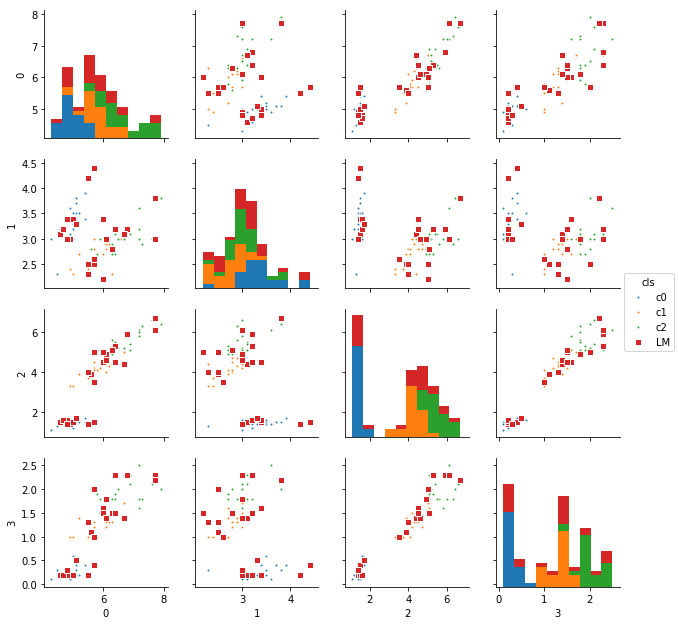

In [68]:
df = pd.DataFrame(np.r_[xtrain, lm])
df['cls'] = ['c'+str(ee) for ee in np.argmax(ytrain, axis=1)] + ['LM']*lm.shape[0]
df.head()

fig = sns.pairplot(df, markers=['.']*3+['s'], hue='cls', size=2.2, diag_kind='hist')

In [69]:
clf.predict_proba(xtest)[:5]

array([[1.0000000e+00, 1.9250506e-09, 7.9377477e-13],
       [1.0000000e+00, 1.6811227e-09, 2.8742807e-13],
       [1.0000000e+00, 2.7286897e-09, 1.4009788e-12],
       [1.0000000e+00, 3.4892620e-09, 8.8887708e-13],
       [9.9999976e-01, 1.8099185e-07, 1.7698565e-10]], dtype=float32)

In [70]:
pred = clf.predict(xtrain)
pred[:5]

array([0, 0, 0, 0, 0])

In [71]:
print('F1_SCORE :', f1_score(np.argmax(ytrain, axis=1), pred, average='macro'))
print(classification_report(np.argmax(ytrain, axis=1), pred))
print(confusion_matrix(np.argmax(ytrain, axis=1), pred))

F1_SCORE : 0.9732905982905983
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      0.92      0.96        25
           2       0.93      1.00      0.96        25

   micro avg       0.97      0.97      0.97        75
   macro avg       0.98      0.97      0.97        75
weighted avg       0.98      0.97      0.97        75

[[25  0  0]
 [ 0 23  2]
 [ 0  0 25]]


In [72]:
pred_test = clf.predict(xtest)

In [73]:
print('F1_SCORE :', f1_score(np.argmax(yans, axis=1), pred_test, average='macro'))
print(classification_report(np.argmax(yans, axis=1), pred_test))
print(confusion_matrix(np.argmax(yans, axis=1), pred_test))

F1_SCORE : 0.9732905982905983
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       0.93      1.00      0.96        25
           2       1.00      0.92      0.96        25

   micro avg       0.97      0.97      0.97        75
   macro avg       0.98      0.97      0.97        75
weighted avg       0.98      0.97      0.97        75

[[25  0  0]
 [ 0 25  0]
 [ 0  2 23]]


## set initial landmarks manually and train
* num_lm = 15
* train landmarks

In [74]:
num_lm = 15
init_lm = np.c_[
    np.random.random((num_lm,))*4+4,
    np.random.random((num_lm,))*2+2.5,
    np.random.random((num_lm,))*4+2,
    np.random.random((num_lm,))*2.5
]
# init_lm = np.c_[
#     np.random.random((num_lm,)),
#     np.random.random((num_lm,)),
#     np.random.random((num_lm,)),
#     np.random.random((num_lm,))
# ]

clf = RBFClassifier(
    num_lm=num_lm,
    lm=init_lm,
    make_model_gkernel=make_model_gkernel3
)

In [75]:
init_lm

array([[5.14955943, 3.67576623, 5.81143689, 0.50235503],
       [5.59439857, 3.50669773, 4.91542388, 0.41281957],
       [6.38248154, 2.72870908, 2.33442131, 1.02102925],
       [4.65043843, 3.95491173, 4.10536341, 0.02790529],
       [5.23969207, 3.89754848, 3.60408102, 1.91904718],
       [5.94559756, 4.05885494, 3.71248322, 0.42857739],
       [7.31287162, 3.40987644, 5.34334557, 2.45322205],
       [7.61209207, 4.49315341, 3.88943109, 0.19212014],
       [7.67200001, 4.10693584, 2.11583037, 0.66486617],
       [5.30710601, 3.47335097, 4.20196113, 0.6720615 ],
       [4.99990124, 4.42935995, 3.53336041, 1.10816945],
       [7.4517696 , 3.62416453, 2.4445711 , 0.10951487],
       [5.15718924, 4.22367035, 2.50945166, 0.98039961],
       [4.35072489, 2.93941083, 2.19372704, 2.14814505],
       [6.0239671 , 3.08208424, 2.55394383, 1.51650082]])

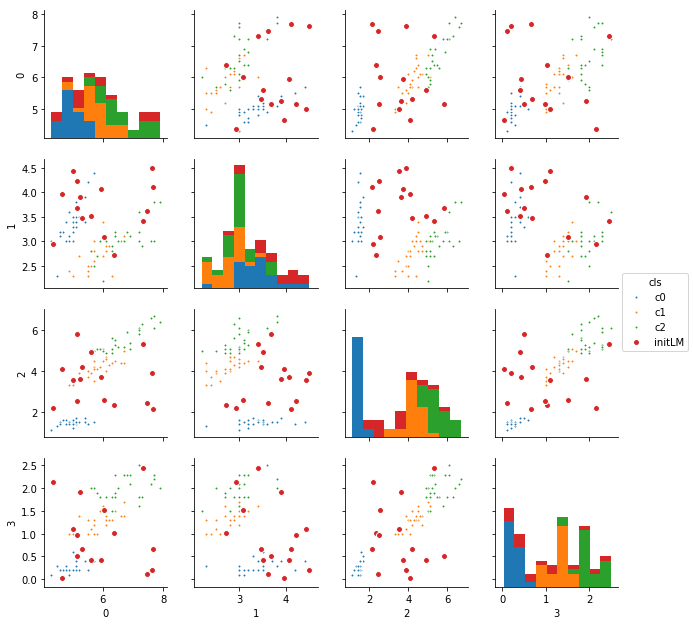

In [76]:
df = pd.DataFrame(np.r_[xtrain, init_lm])
df['cls'] = ['c'+str(ee) for ee in np.argmax(ytrain, axis=1)] + ['initLM']*init_lm.shape[0]
df.head()

fig = sns.pairplot(df, markers=['.']*3+['o'], hue='cls', size=2.2, diag_kind='hist')

In [77]:
%%time
#hst = clf.fit(xtrain, ytrain, epochs=500, batch_size=256, verbose=0)
hst = clf.fit(xtrain, ytrain, epochs=200, verbose=0)

CPU times: user 3.09 s, sys: 33.1 ms, total: 3.12 s
Wall time: 2.83 s


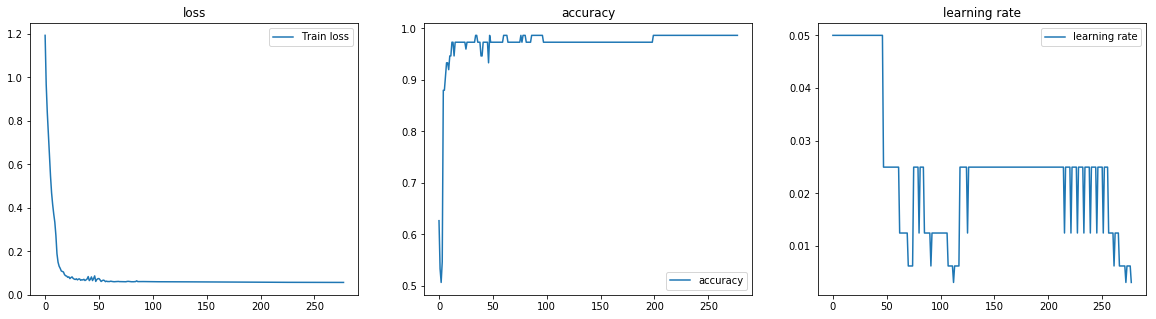

In [78]:
fig, ax = plt.subplots(1, 3, figsize=(20,5))
ax[0].set_title('loss')
ax[0].plot(list(range(len(hst["loss"]))), hst["loss"], label="Train loss")
ax[1].set_title('accuracy')
ax[1].plot(list(range(len(hst["loss"]))), hst["acc"], label="accuracy")
ax[2].set_title('learning rate')
ax[2].plot(list(range(len(hst["loss"]))), hst["lr"], label="learning rate")
ax[0].legend()
ax[1].legend()
ax[2].legend()

In [79]:
'''
trained gamma
'''
clf.current_gamma()

0.2538201

In [80]:
'''
trained landmarks
'''
lm = clf.current_lm()
lm

array([[6.011074  , 2.7087529 , 5.537068  , 2.5953226 ],
       [5.2384667 , 2.4449606 , 4.1087475 , 1.3483324 ],
       [6.681369  , 3.362491  , 2.6814501 , 0.43938473],
       [5.7959347 , 3.231947  , 3.843981  , 0.07606509],
       [6.286527  , 3.2147908 , 3.7027707 , 0.45873505],
       [6.9476852 , 3.4005642 , 3.9047422 , 0.49322706],
       [6.2250724 , 2.7523086 , 5.769888  , 2.6655056 ],
       [7.0924406 , 3.4814947 , 4.148028  , 0.58278996],
       [6.383486  , 3.4815006 , 2.3037505 , 0.34213322],
       [6.438469  , 3.2481356 , 3.743008  , 0.33587384],
       [6.4016714 , 3.673391  , 3.6330478 , 0.35448816],
       [6.602989  , 3.4371724 , 2.5611196 , 0.3838164 ],
       [5.032366  , 3.484064  , 1.5099304 , 0.11998755],
       [4.9256215 , 3.5401318 , 1.1224211 , 0.5538356 ],
       [6.702355  , 3.3667653 , 2.667434  , 0.4996429 ]], dtype=float32)

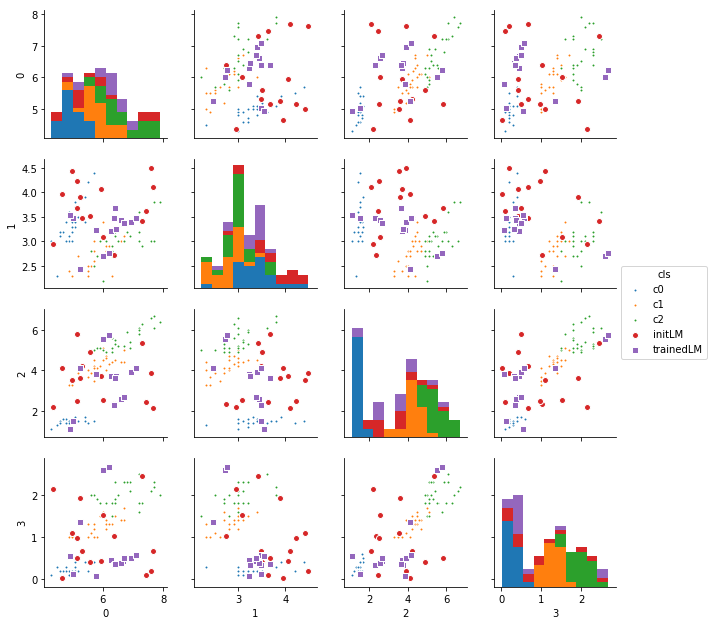

In [81]:
df = pd.DataFrame(np.r_[xtrain, init_lm, lm])
df['cls'] = ['c'+str(ee) for ee in np.argmax(ytrain, axis=1)] + ['initLM']*init_lm.shape[0] + ['trainedLM']*lm.shape[0]
df.head()

fig = sns.pairplot(df, markers=['.']*3+['o','s'], hue='cls', size=2.2, diag_kind='hist')

In [82]:
clf.predict_proba(xtest)[:5]

array([[9.99881148e-01, 1.18509495e-04, 3.15943169e-07],
       [9.99858022e-01, 1.37008232e-04, 5.03304318e-06],
       [9.99888182e-01, 1.11268273e-04, 5.37176277e-07],
       [9.99849319e-01, 1.45331185e-04, 5.34494939e-06],
       [9.99469340e-01, 4.63743927e-04, 6.69519941e-05]], dtype=float32)

In [83]:
pred = clf.predict(xtrain)
pred[:5]

array([0, 0, 0, 0, 0])

In [84]:
print('F1_SCORE :', f1_score(np.argmax(ytrain, axis=1), pred, average='macro'))
print(classification_report(np.argmax(ytrain, axis=1), pred))
print(confusion_matrix(np.argmax(ytrain, axis=1), pred))

F1_SCORE : 0.9866613311991462
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      0.96      0.98        25
           2       0.96      1.00      0.98        25

   micro avg       0.99      0.99      0.99        75
   macro avg       0.99      0.99      0.99        75
weighted avg       0.99      0.99      0.99        75

[[25  0  0]
 [ 0 24  1]
 [ 0  0 25]]


In [85]:
pred_test = clf.predict(xtest)

In [86]:
print('F1_SCORE :', f1_score(np.argmax(yans, axis=1), pred_test, average='macro'))
print(classification_report(np.argmax(yans, axis=1), pred_test))
print(confusion_matrix(np.argmax(yans, axis=1), pred_test))

F1_SCORE : 0.9866613311991462
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      0.96      0.98        25
           2       0.96      1.00      0.98        25

   micro avg       0.99      0.99      0.99        75
   macro avg       0.99      0.99      0.99        75
weighted avg       0.99      0.99      0.99        75

[[25  0  0]
 [ 0 24  1]
 [ 0  0 25]]


## set initial landmarks manually and no train
* num_lm = 15
* train nothing, just activation

In [87]:
num_lm = 15
init_lm = np.c_[
    np.random.random((num_lm,))*4+4,
    np.random.random((num_lm,))*2+2.5,
    np.random.random((num_lm,))*4+2,
    np.random.random((num_lm,))*2.5
]

clf = RBFClassifier(
    num_lm=num_lm,
    lm=init_lm,
    gamma='scale',
    make_model_gkernel=make_model_gkernel1
)

In [88]:
init_lm

array([[5.80378963, 2.54193914, 3.32703104, 0.43789782],
       [7.37962978, 2.63430174, 4.23388919, 1.20119383],
       [4.28687185, 2.72310115, 4.62537657, 0.94505249],
       [6.40450424, 2.51223217, 3.09727246, 1.067592  ],
       [6.48384281, 3.71967037, 2.63940439, 0.97046006],
       [4.99744975, 3.06289124, 3.69269379, 2.14415494],
       [5.6670373 , 3.73257567, 4.11543102, 1.22449564],
       [5.37309923, 4.42451969, 2.7675124 , 1.85352887],
       [4.54202581, 4.39162603, 4.31612162, 0.74399049],
       [6.3691502 , 3.33161694, 3.27828665, 2.485005  ],
       [6.06779352, 4.00439311, 2.55817175, 0.71788224],
       [6.02957096, 4.3113433 , 2.09421511, 0.55494889],
       [4.59371231, 3.1888312 , 2.68686464, 1.42028225],
       [6.93570259, 4.384649  , 4.95997603, 2.43027756],
       [6.06029449, 3.05412653, 4.13279428, 2.46309549]])

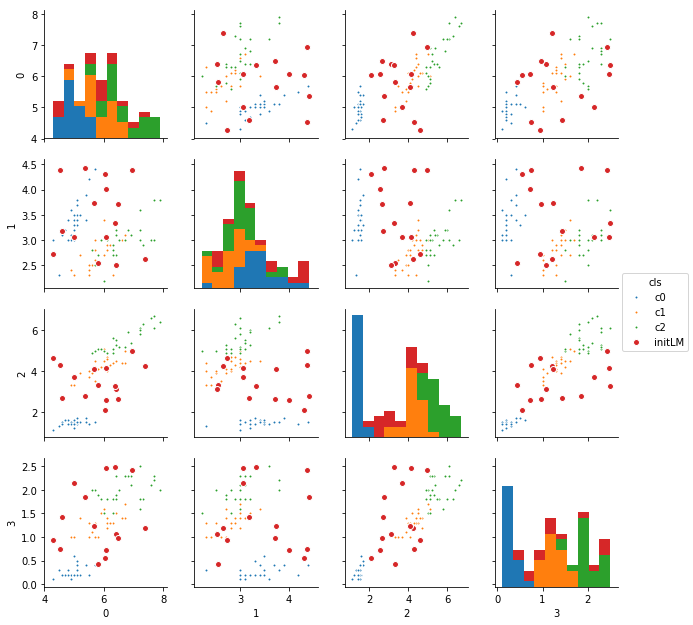

In [89]:
df = pd.DataFrame(np.r_[xtrain, init_lm])
df['cls'] = ['c'+str(ee) for ee in np.argmax(ytrain, axis=1)] + ['initLM']*init_lm.shape[0]
df.head()

fig = sns.pairplot(df, markers=['.']*3+['o'], hue='cls', size=2.2, diag_kind='hist')

In [90]:
%%time
#hst = clf.fit(xtrain, ytrain, epochs=500, batch_size=256, verbose=0)
hst = clf.fit(xtrain, ytrain, epochs=200, verbose=0)

CPU times: user 5.65 s, sys: 113 ms, total: 5.76 s
Wall time: 4.77 s


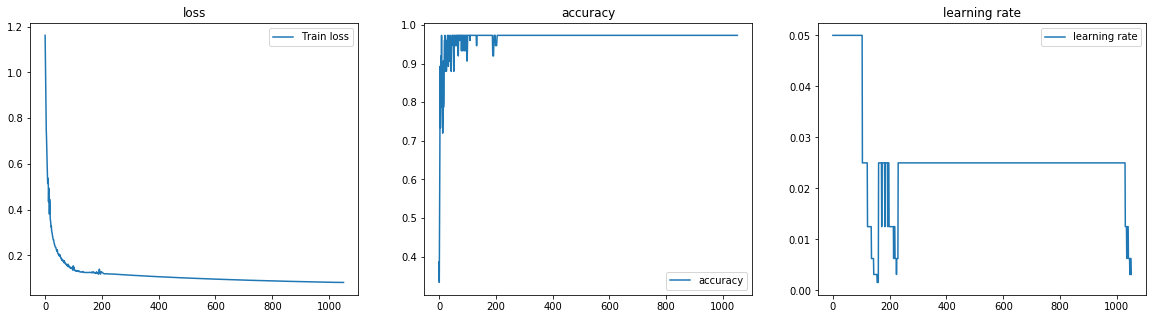

In [91]:
fig, ax = plt.subplots(1, 3, figsize=(20,5))
ax[0].set_title('loss')
ax[0].plot(list(range(len(hst["loss"]))), hst["loss"], label="Train loss")
ax[1].set_title('accuracy')
ax[1].plot(list(range(len(hst["loss"]))), hst["acc"], label="accuracy")
ax[2].set_title('learning rate')
ax[2].plot(list(range(len(hst["loss"]))), hst["lr"], label="learning rate")
ax[0].legend()
ax[1].legend()
ax[2].legend()

In [92]:
1 / (4*xtrain.var()), 1/(2*np.sqrt(4/6)*2)

(0.06392857199469391, 0.30618621784789724)

In [93]:
'''
gamma
'''
clf.current_gamma()

0.063928574

In [94]:
'''
trained nothing
'''
lm = clf.current_lm()
lm

array([[5.8037896 , 2.541939  , 3.3270311 , 0.43789783],
       [7.3796296 , 2.6343017 , 4.233889  , 1.2011938 ],
       [4.286872  , 2.7231011 , 4.6253767 , 0.9450525 ],
       [6.4045043 , 2.512232  , 3.0972724 , 1.067592  ],
       [6.483843  , 3.7196703 , 2.6394043 , 0.97046006],
       [4.99745   , 3.0628912 , 3.6926937 , 2.144155  ],
       [5.6670375 , 3.7325757 , 4.115431  , 1.2244956 ],
       [5.3730993 , 4.4245195 , 2.7675123 , 1.8535289 ],
       [4.542026  , 4.391626  , 4.3161216 , 0.7439905 ],
       [6.36915   , 3.3316169 , 3.2782867 , 2.485005  ],
       [6.0677934 , 4.004393  , 2.5581717 , 0.7178822 ],
       [6.029571  , 4.311343  , 2.0942152 , 0.55494887],
       [4.5937123 , 3.188831  , 2.6868646 , 1.4202822 ],
       [6.935703  , 4.384649  , 4.959976  , 2.4302776 ],
       [6.0602946 , 3.0541265 , 4.1327944 , 2.4630954 ]], dtype=float32)

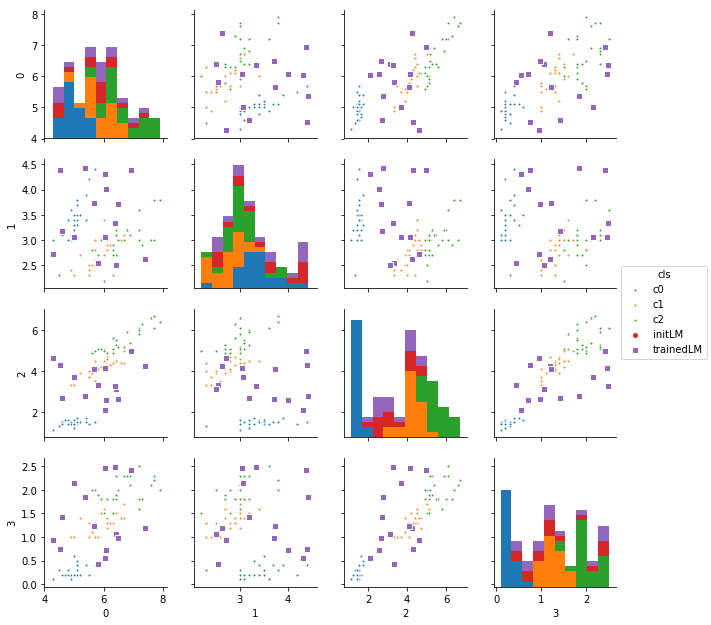

In [95]:
df = pd.DataFrame(np.r_[xtrain, init_lm, lm])
df['cls'] = ['c'+str(ee) for ee in np.argmax(ytrain, axis=1)] + ['initLM']*init_lm.shape[0] + ['trainedLM']*lm.shape[0]
df.head()

fig = sns.pairplot(df, markers=['.']*3+['o','s'], hue='cls', size=2.2, diag_kind='hist')

In [96]:
clf.predict_proba(xtest)[:5]

array([[9.9791259e-01, 2.0873642e-03, 4.7755222e-09],
       [9.9809307e-01, 1.9068987e-03, 2.2274550e-08],
       [9.9833483e-01, 1.6651930e-03, 4.5677804e-09],
       [9.9806005e-01, 1.9399548e-03, 2.0210722e-08],
       [9.9686384e-01, 3.1361070e-03, 1.4309273e-07]], dtype=float32)

In [97]:
clf.predict_proba(xtest).sum(axis=1)

array([0.99999994, 0.99999994, 1.        , 1.        , 1.0000001 ,
       1.        , 1.        , 1.0000001 , 0.99999994, 1.        ,
       0.99999994, 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.0000001 , 1.        , 1.        ,
       0.99999994, 1.        , 1.        , 0.99999994, 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 0.99999994, 1.        , 0.99999994, 1.        ,
       1.        , 1.        , 1.        , 0.99999994, 1.        ,
       1.        , 0.9999999 , 1.0000001 , 1.        , 0.99999994,
       1.        , 1.0000001 , 1.0000001 , 0.99999994, 1.0000001 ,
       1.        , 1.        , 0.99999994, 1.        , 1.        ,
       0.99999994, 1.        , 0.99999994, 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       0.99999994, 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.     

In [98]:
pred = clf.predict(xtrain)
pred[:5]

array([0, 0, 0, 0, 0])

In [99]:
print('F1_SCORE :', f1_score(np.argmax(ytrain, axis=1), pred, average='macro'))
print(classification_report(np.argmax(ytrain, axis=1), pred))
print(confusion_matrix(np.argmax(ytrain, axis=1), pred))

F1_SCORE : 0.9732905982905983
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      0.92      0.96        25
           2       0.93      1.00      0.96        25

   micro avg       0.97      0.97      0.97        75
   macro avg       0.98      0.97      0.97        75
weighted avg       0.98      0.97      0.97        75

[[25  0  0]
 [ 0 23  2]
 [ 0  0 25]]


In [100]:
pred_test = clf.predict(xtest)

In [101]:
print('F1_SCORE :', f1_score(np.argmax(yans, axis=1), pred_test, average='macro'))
print(classification_report(np.argmax(yans, axis=1), pred_test))
print(confusion_matrix(np.argmax(yans, axis=1), pred_test))

F1_SCORE : 0.9599839935974389
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       0.92      0.96      0.94        25
           2       0.96      0.92      0.94        25

   micro avg       0.96      0.96      0.96        75
   macro avg       0.96      0.96      0.96        75
weighted avg       0.96      0.96      0.96        75

[[25  0  0]
 [ 0 24  1]
 [ 0  2 23]]


## vector input

In [102]:
num_lm = 15
init_lm = np.c_[
    np.random.random((num_lm,))*4+4,
    np.random.random((num_lm,))*2+2.5,
    np.random.random((num_lm,))*4+2,
    np.random.random((num_lm,))*2.5
]

clf = RBFClassifier(
    num_lm=num_lm,
    lm=init_lm,
    gamma='scale',
    make_model_gkernel=make_model_gkernel1
)

In [103]:
init_lm

array([[4.72700532, 2.9304439 , 4.68303174, 2.14220844],
       [4.9056673 , 3.59252686, 2.16581287, 1.93395567],
       [6.92831647, 3.56752326, 5.63767476, 2.40898783],
       [7.98465785, 3.72901006, 3.15769715, 0.30486786],
       [6.9526915 , 4.31309679, 5.44675121, 0.41104299],
       [5.1513581 , 2.77830092, 2.83569149, 1.43399411],
       [7.32373798, 3.65773743, 5.93170221, 1.21942456],
       [5.1293803 , 2.9556748 , 5.90712418, 1.60997872],
       [4.7890732 , 3.62609525, 5.97025664, 0.23603425],
       [6.23944033, 4.03689546, 5.89500868, 2.14123398],
       [7.54970052, 3.19468643, 5.79711952, 0.87849003],
       [7.42538994, 3.64287069, 3.28973508, 0.9958963 ],
       [4.03144774, 3.46661615, 3.00771436, 2.10260868],
       [5.30080427, 3.46450017, 5.43959954, 1.55232436],
       [7.09308684, 3.19724743, 3.92411858, 1.56679445]])

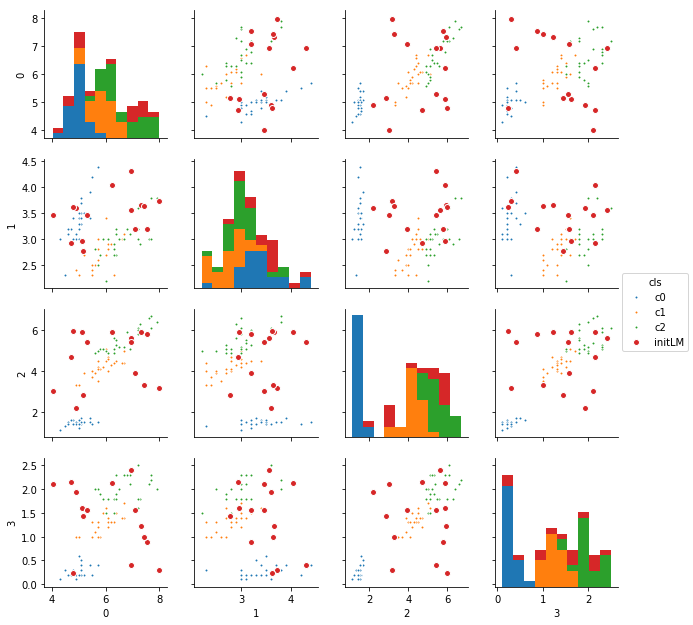

In [104]:
df = pd.DataFrame(np.r_[xtrain, init_lm])
df['cls'] = ['c'+str(ee) for ee in np.argmax(ytrain, axis=1)] + ['initLM']*init_lm.shape[0]
df.head()

fig = sns.pairplot(df, markers=['.']*3+['o'], hue='cls', size=2.2, diag_kind='hist')

In [105]:
ytrain[:5]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [106]:
np.argmax(ytrain, axis=1)[:5]

array([0, 0, 0, 0, 0])

In [107]:
%%time
#hst = clf.fit(xtrain, np.argmax(ytrain, axis=1), epochs=500, batch_size=256, verbose=0)
hst = clf.fit(xtrain, np.argmax(ytrain, axis=1), epochs=200, verbose=0)

CPU times: user 6.16 s, sys: 156 ms, total: 6.32 s
Wall time: 5.26 s


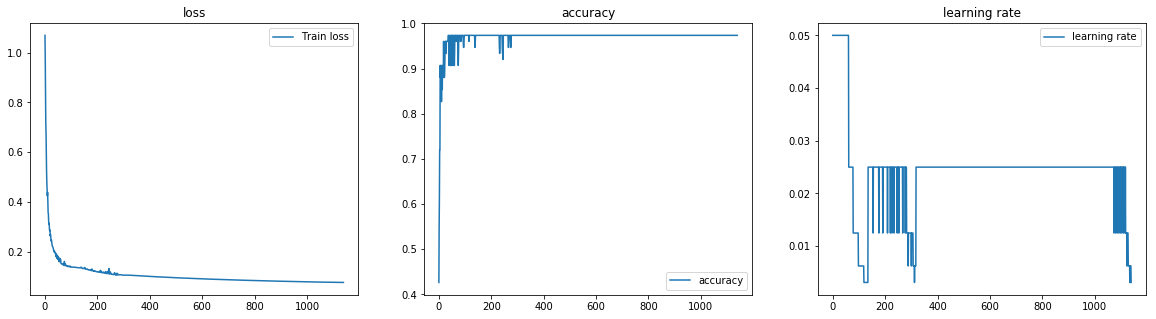

In [108]:
fig, ax = plt.subplots(1, 3, figsize=(20,5))
ax[0].set_title('loss')
ax[0].plot(list(range(len(hst["loss"]))), hst["loss"], label="Train loss")
ax[1].set_title('accuracy')
ax[1].plot(list(range(len(hst["loss"]))), hst["acc"], label="accuracy")
ax[2].set_title('learning rate')
ax[2].plot(list(range(len(hst["loss"]))), hst["lr"], label="learning rate")
ax[0].legend()
ax[1].legend()
ax[2].legend()

In [109]:
1 / (4*xtrain.var()), 1/(2*np.sqrt(4/6)*2)

(0.06392857199469391, 0.30618621784789724)

In [110]:
'''
gamma
'''
clf.current_gamma()

0.063928574

In [111]:
'''
trained nothing
'''
lm = clf.current_lm()
lm

array([[4.7270055 , 2.930444  , 4.6830316 , 2.1422083 ],
       [4.9056673 , 3.592527  , 2.165813  , 1.9339557 ],
       [6.9283166 , 3.5675232 , 5.637675  , 2.4089878 ],
       [7.984658  , 3.72901   , 3.1576972 , 0.30486786],
       [6.9526916 , 4.313097  , 5.446751  , 0.411043  ],
       [5.151358  , 2.778301  , 2.8356915 , 1.433994  ],
       [7.323738  , 3.6577375 , 5.931702  , 1.2194246 ],
       [5.12938   , 2.955675  , 5.907124  , 1.6099787 ],
       [4.789073  , 3.6260953 , 5.970257  , 0.23603424],
       [6.2394404 , 4.0368953 , 5.8950086 , 2.141234  ],
       [7.5497007 , 3.1946864 , 5.7971196 , 0.87849003],
       [7.42539   , 3.6428707 , 3.289735  , 0.9958963 ],
       [4.031448  , 3.4666162 , 3.0077143 , 2.1026087 ],
       [5.300804  , 3.4645002 , 5.4395995 , 1.5523244 ],
       [7.0930867 , 3.1972475 , 3.9241185 , 1.5667944 ]], dtype=float32)

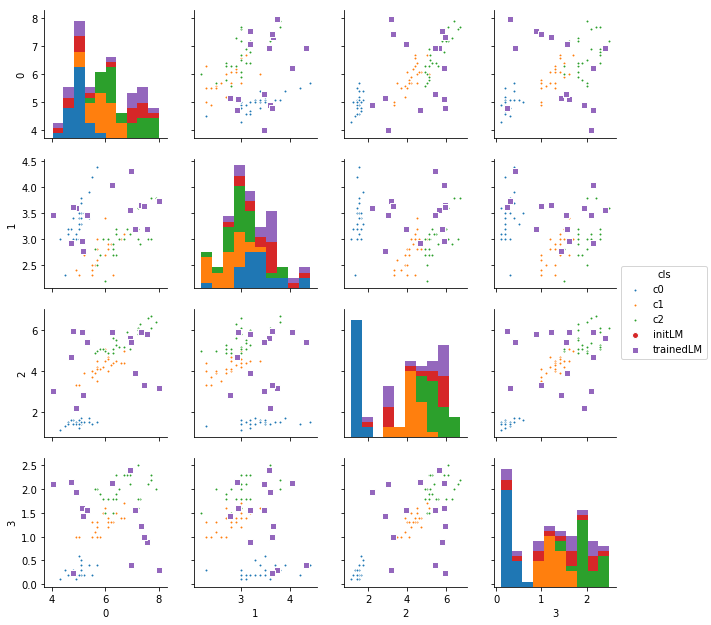

In [112]:
df = pd.DataFrame(np.r_[xtrain, init_lm, lm])
df['cls'] = ['c'+str(ee) for ee in np.argmax(ytrain, axis=1)] + ['initLM']*init_lm.shape[0] + ['trainedLM']*lm.shape[0]
df.head()

fig = sns.pairplot(df, markers=['.']*3+['o','s'], hue='cls', size=2.2, diag_kind='hist')

In [113]:
clf.predict_proba(xtest)[:5]

array([[9.9843735e-01, 1.5626014e-03, 1.4082315e-08],
       [9.9936610e-01, 6.3385745e-04, 1.9734619e-08],
       [9.9862862e-01, 1.3713541e-03, 1.6069061e-08],
       [9.9921691e-01, 7.8303943e-04, 2.3245116e-08],
       [9.9938238e-01, 6.1754481e-04, 4.7807344e-08]], dtype=float32)

In [114]:
pred = clf.predict(xtrain)
pred[:5]

array([0, 0, 0, 0, 0])

In [115]:
print('F1_SCORE :', f1_score(np.argmax(ytrain, axis=1), pred, average='macro'))
print(classification_report(np.argmax(ytrain, axis=1), pred))
print(confusion_matrix(np.argmax(ytrain, axis=1), pred))

F1_SCORE : 0.9732905982905983
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      0.92      0.96        25
           2       0.93      1.00      0.96        25

   micro avg       0.97      0.97      0.97        75
   macro avg       0.98      0.97      0.97        75
weighted avg       0.98      0.97      0.97        75

[[25  0  0]
 [ 0 23  2]
 [ 0  0 25]]


In [116]:
pred_test = clf.predict(xtest)

In [117]:
print('F1_SCORE :', f1_score(np.argmax(yans, axis=1), pred_test, average='macro'))
print(classification_report(np.argmax(yans, axis=1), pred_test))
print(confusion_matrix(np.argmax(yans, axis=1), pred_test))

F1_SCORE : 0.9599839935974389
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       0.92      0.96      0.94        25
           2       0.96      0.92      0.94        25

   micro avg       0.96      0.96      0.96        75
   macro avg       0.96      0.96      0.96        75
weighted avg       0.96      0.96      0.96        75

[[25  0  0]
 [ 0 24  1]
 [ 0  2 23]]


## sigmoid + binary_crossentropy

In [118]:
num_lm = 15
init_lm = np.c_[
    np.random.random((num_lm,))*4+4,
    np.random.random((num_lm,))*2+2.5,
    np.random.random((num_lm,))*4+2,
    np.random.random((num_lm,))*2.5
]

clf = RBFClassifier(
    num_lm=num_lm,
    lm=init_lm,
    gamma='scale',
    activation='sigmoid', loss='binary_crossentropy',
    make_model_gkernel=make_model_gkernel3
)

In [119]:
init_lm

array([[7.06702312, 3.22362461, 4.3493119 , 2.00825073],
       [6.37881471, 3.43341293, 2.141998  , 1.98347589],
       [4.45252257, 2.97162235, 4.46148551, 1.94655002],
       [7.87601785, 4.25923921, 3.20538509, 2.09989716],
       [7.76682422, 3.63986875, 2.41279567, 0.61582828],
       [4.42701597, 3.82105354, 4.23707303, 1.96536179],
       [5.16844202, 2.50611003, 4.71718674, 2.37301586],
       [6.15026229, 3.494074  , 4.08469187, 1.85320105],
       [7.84459485, 3.62748627, 2.81933895, 0.32403525],
       [7.09143219, 2.8066382 , 5.76587176, 0.24108464],
       [6.3956883 , 3.13020058, 4.27323744, 0.33259888],
       [6.83690224, 2.93741071, 4.49018953, 2.18175796],
       [5.19678043, 2.77945512, 2.3373923 , 1.21481788],
       [6.46083475, 4.35928354, 5.98525393, 0.49056523],
       [7.9440552 , 3.71382635, 3.47660663, 0.47744567]])

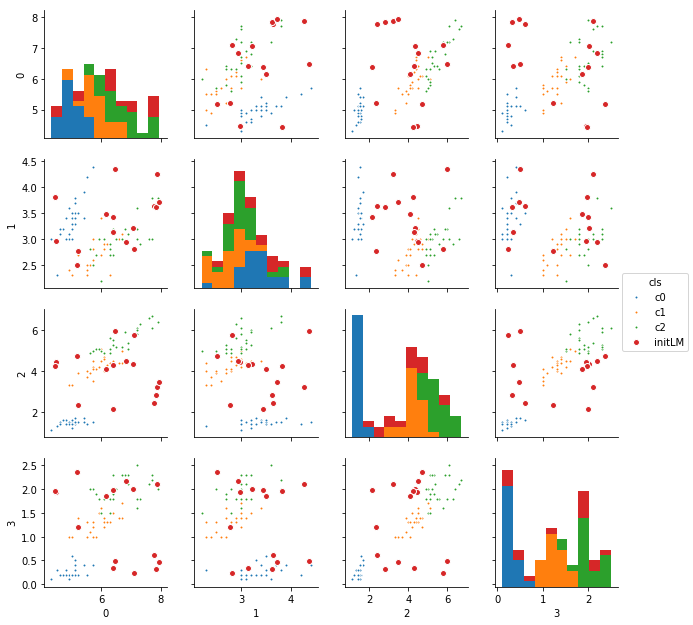

In [120]:
df = pd.DataFrame(np.r_[xtrain, init_lm])
df['cls'] = ['c'+str(ee) for ee in np.argmax(ytrain, axis=1)] + ['initLM']*init_lm.shape[0]
df.head()

fig = sns.pairplot(df, markers=['.']*3+['o'], hue='cls', size=2.2, diag_kind='hist')

In [121]:
%%time
#hst = clf.fit(xtrain, ytrain, epochs=500, batch_size=256, verbose=0)
hst = clf.fit(xtrain, ytrain, epochs=200, verbose=0)

CPU times: user 3.25 s, sys: 35.3 ms, total: 3.28 s
Wall time: 3.03 s


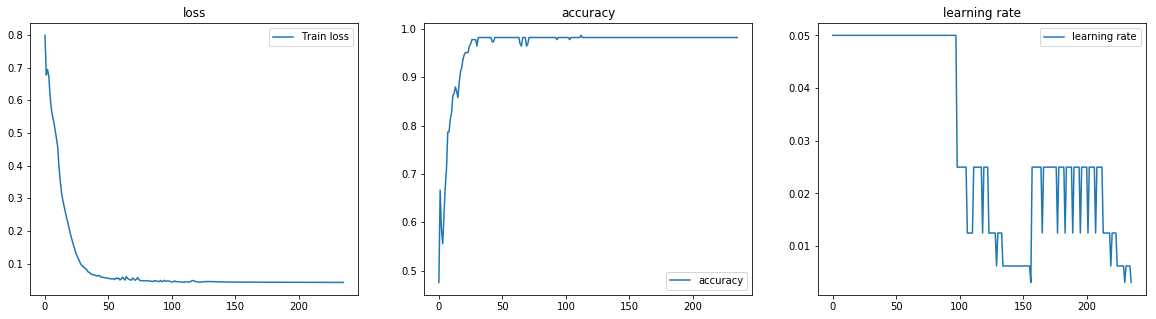

In [122]:
fig, ax = plt.subplots(1, 3, figsize=(20,5))
ax[0].set_title('loss')
ax[0].plot(list(range(len(hst["loss"]))), hst["loss"], label="Train loss")
ax[1].set_title('accuracy')
ax[1].plot(list(range(len(hst["loss"]))), hst["acc"], label="accuracy")
ax[2].set_title('learning rate')
ax[2].plot(list(range(len(hst["loss"]))), hst["lr"], label="learning rate")
ax[0].legend()
ax[1].legend()
ax[2].legend()

In [123]:
'''
gamma
'''
clf.current_gamma()

0.33614022

In [124]:
lm = clf.current_lm()
lm

array([[6.1243415 , 2.6248379 , 5.694266  , 2.5669875 ],
       [5.0216856 , 3.4728189 , 1.2681638 , 0.22152326],
       [6.382593  , 3.170493  , 3.8470082 , 0.736286  ],
       [7.4171844 , 3.3928156 , 6.5871453 , 2.3253226 ],
       [5.0133705 , 3.4506674 , 1.2762824 , 0.22832167],
       [6.4412837 , 3.2092278 , 3.8640249 , 0.73922724],
       [5.1636715 , 2.4893827 , 3.5014975 , 0.79029274],
       [6.4505816 , 3.1986687 , 3.909166  , 0.7490448 ],
       [6.3823223 , 3.210835  , 3.7258708 , 0.71859443],
       [5.5733805 , 2.727912  , 3.6198812 , 0.7233949 ],
       [6.4073343 , 3.171947  , 3.905855  , 0.7462336 ],
       [5.9376183 , 2.532092  , 5.519612  , 2.5635412 ],
       [5.0042267 , 3.413592  , 1.3170247 , 0.23856738],
       [5.9652295 , 2.5441978 , 5.5527487 , 2.566685  ],
       [6.475787  , 3.2249267 , 3.875528  , 0.74190086]], dtype=float32)

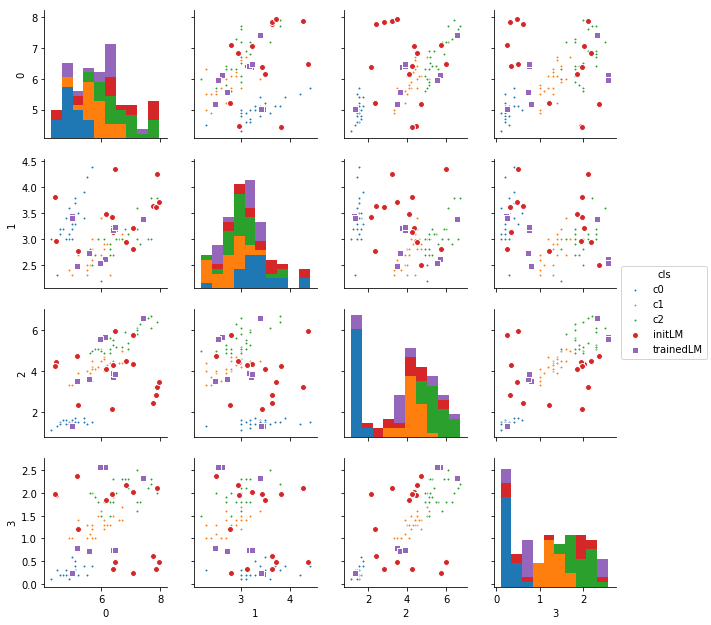

In [125]:
df = pd.DataFrame(np.r_[xtrain, init_lm, lm])
df['cls'] = ['c'+str(ee) for ee in np.argmax(ytrain, axis=1)] + ['initLM']*init_lm.shape[0] + ['trainedLM']*lm.shape[0]
df.head()

fig = sns.pairplot(df, markers=['.']*3+['o','s'], hue='cls', size=2.2, diag_kind='hist')

In [126]:
clf.predict_proba(xtrain)[:5]

array([[9.9935830e-01, 1.2483895e-03, 7.4934959e-04],
       [9.9917924e-01, 1.3801754e-03, 1.0785460e-03],
       [9.9772412e-01, 5.0353706e-03, 6.2581897e-04],
       [9.9957019e-01, 1.0773838e-03, 3.9643049e-04],
       [9.9935079e-01, 1.3387203e-03, 6.3264370e-04]], dtype=float32)

In [127]:
clf.predict_proba(xtrain).sum(axis=1)

array([1.001356  , 1.0016379 , 1.0033853 , 1.001044  , 1.0013222 ,
       1.0012407 , 1.0039389 , 1.0057034 , 1.000957  , 1.001265  ,
       1.0012414 , 1.0024976 , 1.00182   , 1.0011871 , 1.0014776 ,
       1.0018541 , 1.0030761 , 1.0009727 , 1.0009629 , 1.0011042 ,
       1.0105261 , 1.0016786 , 1.0014415 , 1.0013918 , 1.0009611 ,
       0.99541116, 1.0035474 , 1.0021398 , 0.97773063, 1.0006505 ,
       0.9993123 , 0.99648905, 0.99773777, 1.0000391 , 1.0002518 ,
       0.9998957 , 0.998158  , 0.9980025 , 0.92249125, 1.0000356 ,
       1.0001513 , 1.028824  , 0.99003386, 0.997068  , 1.0015037 ,
       0.9972639 , 0.9838512 , 0.9999237 , 0.999635  , 1.0000803 ,
       1.0094155 , 1.0018666 , 1.0000513 , 0.999791  , 1.0005547 ,
       1.0036261 , 1.0070446 , 1.0010916 , 0.9968674 , 1.0168885 ,
       1.0137358 , 1.0168536 , 0.99907136, 1.0149462 , 0.99114627,
       0.9912399 , 0.98848987, 0.99972546, 1.0021684 , 1.0003073 ,
       0.9969888 , 1.0005776 , 1.0009594 , 1.003245  , 1.01518

In [128]:
pred = clf.predict(xtrain)
pred[:5]

array([0, 0, 0, 0, 0])

In [129]:
print('F1_SCORE :', f1_score(np.argmax(ytrain, axis=1), pred, average='macro'))
print(classification_report(np.argmax(ytrain, axis=1), pred))
print(confusion_matrix(np.argmax(ytrain, axis=1), pred))

F1_SCORE : 0.9732905982905983
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      0.92      0.96        25
           2       0.93      1.00      0.96        25

   micro avg       0.97      0.97      0.97        75
   macro avg       0.98      0.97      0.97        75
weighted avg       0.98      0.97      0.97        75

[[25  0  0]
 [ 0 23  2]
 [ 0  0 25]]


In [130]:
pred_test = clf.predict(xtest)

In [131]:
print('F1_SCORE :', f1_score(np.argmax(yans, axis=1), pred_test, average='macro'))
print(classification_report(np.argmax(yans, axis=1), pred_test))
print(confusion_matrix(np.argmax(yans, axis=1), pred_test))

F1_SCORE : 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      1.00      1.00        25
           2       1.00      1.00      1.00        25

   micro avg       1.00      1.00      1.00        75
   macro avg       1.00      1.00      1.00        75
weighted avg       1.00      1.00      1.00        75

[[25  0  0]
 [ 0 25  0]
 [ 0  0 25]]


## Regressor

In [132]:
est = RBFRegressor(
    num_lm=30,
    lm=xtrain[np.random.choice(np.arange(xtrain.shape[0]), 30)],
    make_model_gkernel=make_model_gkernel3
)
# est = RBFRegressor(
#     num_lm=10,
#     lm=xtrain[:10],
#     make_model_gkernel=make_model_gkernel3,
#     loss='mae'
# )

In [133]:
%%time
#hst = est.fit(xtrain, np.argmax(ytrain, axis=1), epochs=500, batch_size=256, verbose=0)
hst = est.fit(xtrain, np.argmax(ytrain, axis=1), epochs=200, verbose=0)

CPU times: user 2.35 s, sys: 20.6 ms, total: 2.37 s
Wall time: 2.22 s


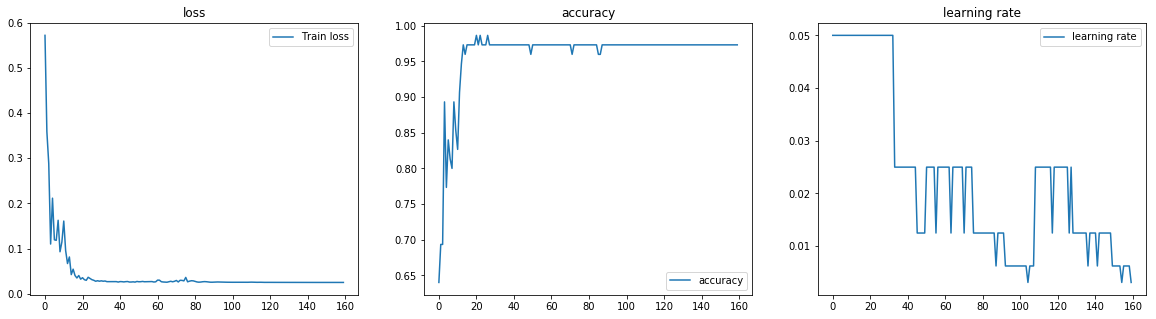

In [134]:
fig, ax = plt.subplots(1, 3, figsize=(20,5))
ax[0].set_title('loss')
ax[0].plot(list(range(len(hst["loss"]))), hst["loss"], label="Train loss")
ax[1].set_title('accuracy')
ax[1].plot(list(range(len(hst["loss"]))), hst["acc"], label="accuracy")
ax[2].set_title('learning rate')
ax[2].plot(list(range(len(hst["loss"]))), hst["lr"], label="learning rate")
ax[0].legend()
ax[1].legend()
ax[2].legend()

In [135]:
est.model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inp (InputLayer)             (None, 4)                 0         
_________________________________________________________________
model_gkernel (Model)        (None, 30)                121       
_________________________________________________________________
model_out (Model)            (None, 1)                 31        
Total params: 152
Trainable params: 152
Non-trainable params: 0
_________________________________________________________________


In [136]:
est.predict(xtrain)

array([-7.44053721e-03,  2.47443020e-02,  4.52671945e-02, -9.25037265e-03,
        2.87847817e-02,  3.02008986e-02, -6.54897988e-02,  4.15151417e-02,
       -6.00610077e-02, -3.20223868e-02, -3.96412313e-02,  7.22930729e-02,
        8.00134242e-02, -6.89724088e-03,  5.23153841e-02, -9.94324684e-04,
        1.90436840e-03, -1.01961195e-01, -4.71862555e-02, -5.53861260e-03,
        8.24590921e-02, -6.59018755e-04, -1.38732791e-02, -2.65915692e-02,
       -4.03305590e-02,  1.01002586e+00,  1.20855653e+00,  1.15743279e+00,
        8.93103004e-01,  1.11717844e+00,  1.07138848e+00,  1.22693539e+00,
        8.70192647e-01,  8.51444125e-01,  9.94030356e-01,  9.11134243e-01,
        1.07846642e+00,  9.31917787e-01,  1.54483342e+00,  8.17157269e-01,
        9.46421385e-01,  1.69859374e+00,  1.01831651e+00,  1.16583693e+00,
        1.15521622e+00,  1.12893999e+00,  9.12706614e-01,  8.90750766e-01,
        9.45409060e-01,  1.03531396e+00,  1.96281528e+00,  1.98017621e+00,
        1.98226178e+00,  

In [137]:
est.__dict__

{'build_fn': <function keras_ex.gkernel.sklearn.make_model>,
 'model': <keras.engine.training.Model at 0x7f93ae72f7f0>,
 'sk_params': {'activation': 'linear',
  'callbacks': None,
  'epochs_warmup': 10,
  'lm': array([[5. , 3.5, 1.6, 0.6],
         [7.9, 3.8, 6.4, 2. ],
         [5. , 3.3, 1.4, 0.2],
         [5.1, 3.8, 1.5, 0.3],
         [5.4, 3.9, 1.7, 0.4],
         [5.2, 3.5, 1.5, 0.2],
         [5. , 3.3, 1.4, 0.2],
         [6.1, 2.8, 4.7, 1.2],
         [5.5, 2.4, 3.7, 1. ],
         [5.7, 3. , 4.2, 1.2],
         [5.1, 3.4, 1.5, 0.2],
         [5. , 3. , 1.6, 0.2],
         [4.9, 3.1, 1.5, 0.1],
         [5.6, 2.5, 3.9, 1.1],
         [5.7, 4.4, 1.5, 0.4],
         [6.1, 3. , 4.9, 1.8],
         [5. , 3.2, 1.2, 0.2],
         [6.4, 3.1, 5.5, 1.8],
         [6.3, 2.8, 5.1, 1.5],
         [6.3, 2.9, 5.6, 1.8],
         [6.2, 2.9, 4.3, 1.3],
         [6. , 2.2, 5. , 1.5],
         [4.6, 3.2, 1.4, 0.2],
         [6.4, 3.2, 5.3, 2.3],
         [7.2, 3.6, 6.1, 2.5],
         [5.4, 3

In [138]:
est.score(xtrain, np.argmax(ytrain, axis=1))

75/75 [==============================] - 0s 2ms/step


-0.025167621473471322

In [139]:
est.score(xtest, np.argmax(yans, axis=1))

75/75 [==============================] - 0s 54us/step


-0.03414325177669525

## AdaBoostClassifier
confirm if it can be used with adaboost

In [140]:
from sklearn.ensemble import AdaBoostClassifier

In [141]:
clf = AdaBoostClassifier(
    RBFClassifier(
        num_lm=30,
        lm_select_from_x=True,
        random_state=None,
        lr=0.05, gamma='scale',
        epochs=50, verbose=0,
        session_clear=False
    ),
    n_estimators=5
)

In [142]:
clf.fit(xtrain, np.argmax(ytrain, axis=1))

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=<keras_ex.gkernel.sklearn.RBFClassifier object at 0x7f93ac725c88>,
          learning_rate=1.0, n_estimators=5, random_state=None)

In [143]:
pred = clf.predict(xtrain)
pred[:5]

array([0, 0, 0, 0, 0])

In [144]:
print('F1_SCORE :', f1_score(np.argmax(ytrain, axis=1), pred, average='macro'))
print(classification_report(np.argmax(ytrain, axis=1), pred))
print(confusion_matrix(np.argmax(ytrain, axis=1), pred))

F1_SCORE : 0.9732905982905983
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      0.92      0.96        25
           2       0.93      1.00      0.96        25

   micro avg       0.97      0.97      0.97        75
   macro avg       0.98      0.97      0.97        75
weighted avg       0.98      0.97      0.97        75

[[25  0  0]
 [ 0 23  2]
 [ 0  0 25]]


In [145]:
pred_test = clf.predict(xtest)

In [146]:
print('F1_SCORE :', f1_score(np.argmax(yans, axis=1), pred_test, average='macro'))
print(classification_report(np.argmax(yans, axis=1), pred_test))
print(confusion_matrix(np.argmax(yans, axis=1), pred_test))

F1_SCORE : 0.9466666666666667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       0.92      0.92      0.92        25
           2       0.92      0.92      0.92        25

   micro avg       0.95      0.95      0.95        75
   macro avg       0.95      0.95      0.95        75
weighted avg       0.95      0.95      0.95        75

[[25  0  0]
 [ 0 23  2]
 [ 0  2 23]]
